# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.profile_visualization import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["NEWMA", "HDDM", "ADWIN", "DDM", "Window", "FLOSS", "ChangeFinder", "ClaSS"]
datasets = ["UTSA", "TSSB", "PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr", "SleepDB"] # 
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))


for idx, (name, file_name) in enumerate(tqdm(methods)):
    df = []
    
    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/competitor_{d}/{file_name}", usecols=["dataset", eval_score], compression="gzip"))
            
    df = pd.concat(df)    
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))
    
    gc.collect()
        
df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores.reset_index(drop=True, inplace=True)
df_scores

100%|█████████████████████████████████████████████| 8/8 [13:05<00:00, 98.21s/it]


,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,Adiac,0.303,0.303,0.303,0.303,0.415,0.303,0.445,0.706
1,ArrowHead,0.653,0.500,0.500,0.500,0.753,0.500,0.500,0.985
2,Beef,0.331,0.500,0.500,0.500,0.538,0.500,0.500,0.939
3,BeetleFly,0.901,0.500,0.500,0.903,0.668,0.500,0.500,0.682
4,BirdChicken,0.470,0.500,0.500,0.849,0.444,0.500,0.500,0.977
5,CBF,0.342,0.342,0.342,0.342,0.530,0.342,0.949,0.969
6,Cane,0.312,0.630,0.507,0.507,0.858,0.507,0.637,0.831
7,Car,0.256,0.256,0.256,0.256,0.610,0.256,0.256,0.889
8,Chinatown,1.000,1.000,1.000,0.996,0.588,1.000,1.000,1.000
9,ChlorineConcentration,0.577,0.577,0.577,0.578,0.614,0.577,0.577,0.577


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1656/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.284
HDDM            0.267
NEWMA           0.254
ChangeFinder    0.432
DDM             0.311
Window          0.322
FLOSS           0.386
ClaSS           0.569
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1656/1729043111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.243
HDDM            0.250
NEWMA           0.136
ChangeFinder    0.420
DDM             0.242
Window          0.250
FLOSS           0.368
ClaSS           0.550
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1656/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.210
HDDM            0.203
NEWMA           0.267
ChangeFinder    0.205
DDM             0.256
Window          0.279
FLOSS           0.165
ClaSS           0.208
dtype: float64

In [9]:
# sensors
ECG = ("MIT-BIH", "ECG")
ACC = ("ACC", "Acc")
GYRO = ("Gyro",)
MAG = ("Mag",)
EEG = ("EEG",)
EOG = ("EOG",)
EMG = ("EMG",)
EDA = ("EDA",)
Resp = ("Resp",)
Temp = ("Temp",)

df_sel = df_scores[df_scores.dataset.apply(lambda d: any(sensor in d for sensor in Temp))]
df_sel.shape

(4, 9)

In [10]:
df_sel = df_scores[df_scores.dataset.apply(lambda n: "MIT-BIH-Arr" in n)]

Let's compute the wins per method.

In [11]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [12]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

ADWIN:wins=29 rank=4.7
HDDM:wins=26 rank=4.9
NEWMA:wins=54 rank=5.1
ChangeFinder:wins=107 rank=3.2
DDM:wins=53 rank=4.6
Window:wins=77 rank=4.3
FLOSS:wins=57 rank=3.6
ClaSS:wins=305 rank=2.0


Let's plot and output the ranks.

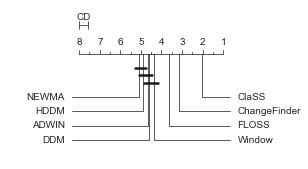

In [13]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../../figures/cd_comparative_combined.pdf") # 

Let's compute wins/losses against ClaSP.

In [14]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 533/13/46
ClaSS vs HDDM: (wins/ties/losses): 514/16/62
ClaSS vs NEWMA: (wins/ties/losses): 511/22/59
ClaSS vs ChangeFinder: (wins/ties/losses): 422/13/157
ClaSS vs DDM: (wins/ties/losses): 510/3/79
ClaSS vs Window: (wins/ties/losses): 473/15/104
ClaSS vs FLOSS: (wins/ties/losses): 482/19/91


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1656/1803594406.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1656/1803594406.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


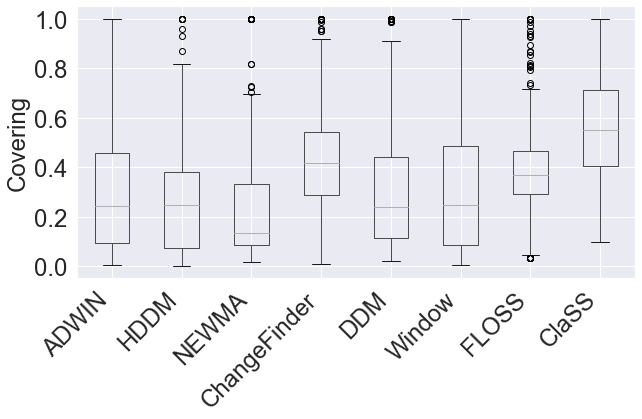

In [15]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_combined.pdf", bbox_inches="tight") 